# K Nearest Neighbors Project 

## Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["patch.force_edgecolor"] = True
%matplotlib inline

## Get the Data

In [2]:
knn_data = pd.read_csv('../data/KNN_Project_Data')

In [3]:
knn_data.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


# EDA

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


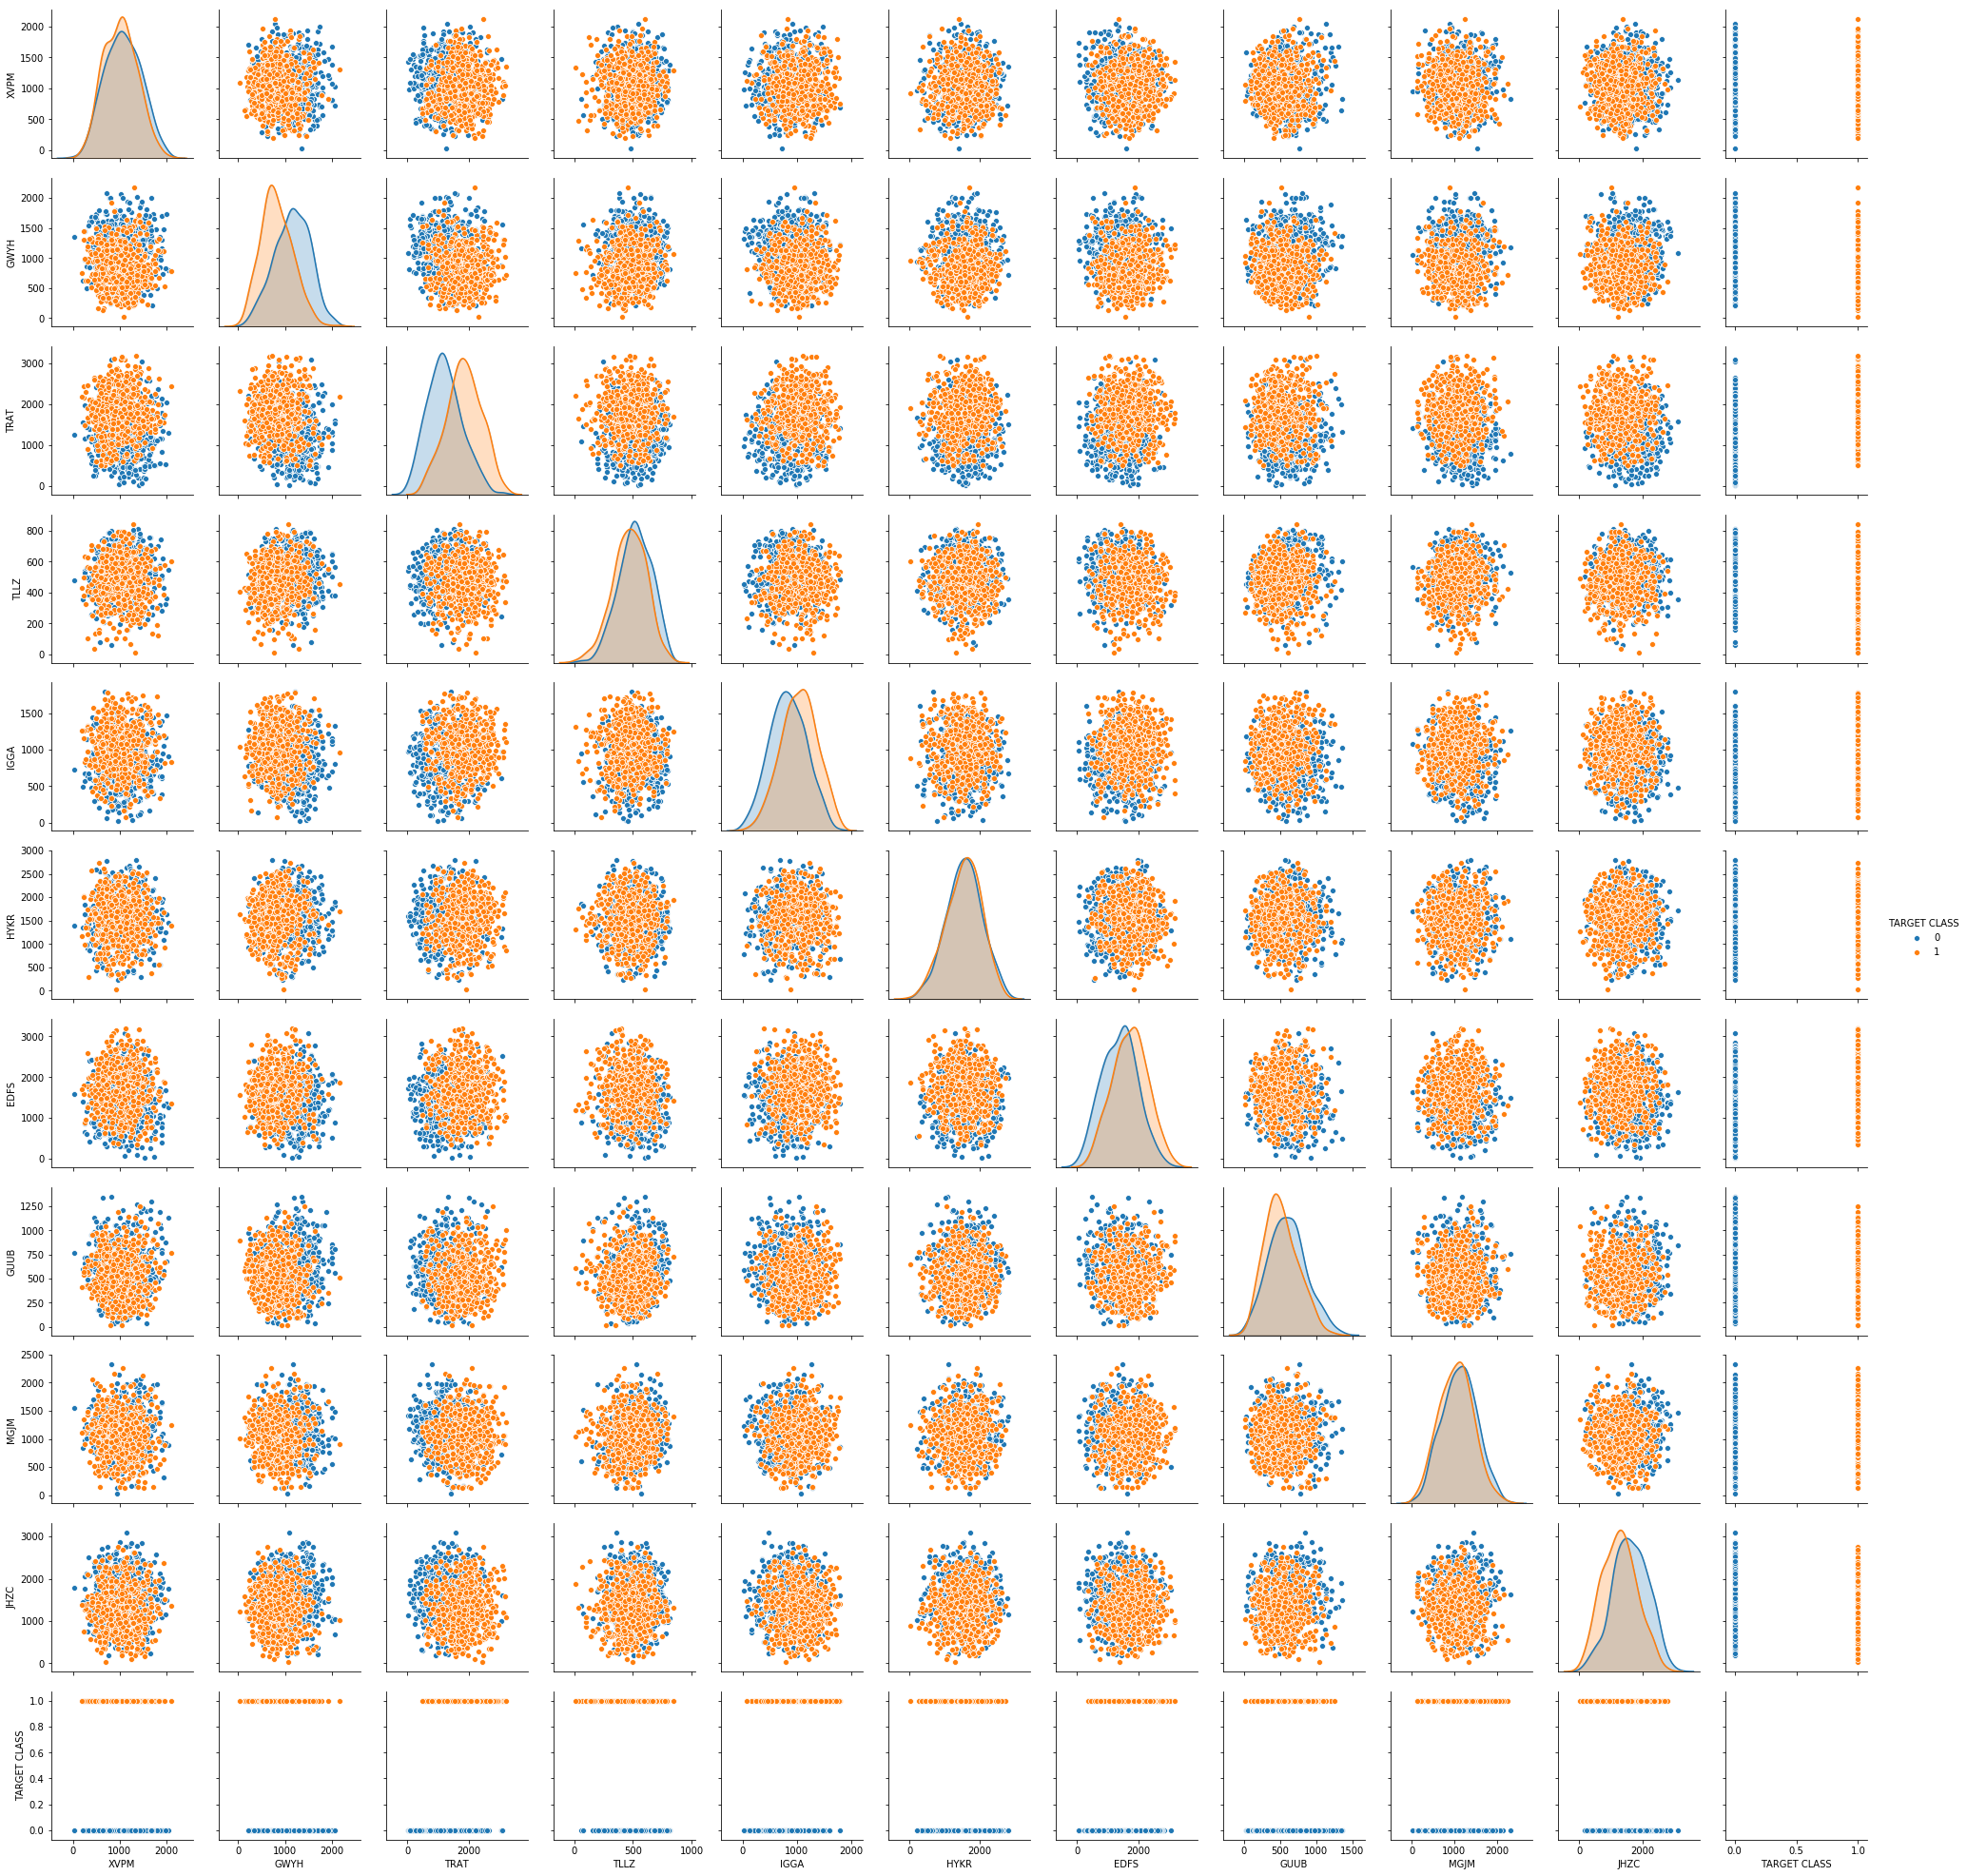

In [4]:
sns.pairplot(data=knn_data, hue='TARGET CLASS')

# Standardize the Variables


In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()

In [9]:
scaler.fit(knn_data.drop('TARGET CLASS', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [11]:
scaled_features = scaler.transform(knn_data.drop('TARGET CLASS',axis=1))

In [13]:
df_scaled = pd.DataFrame(scaled_features,columns=knn_data.columns[:-1])
df_scaled.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


# Train Test Split

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = scaled_features
y = knn_data['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

# Using KNN

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
knn_model = KNeighborsClassifier(n_neighbors=1)

In [18]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

# Predictions and Evaluations
Let's evaluate our KNN model!

**Use the predict method to predict values using your KNN model and X_test.**

In [19]:
predict = knn_model.predict(X_test)

** Create a confusion matrix and classification report.**

In [20]:
from sklearn.metrics import classification_report, confusion_matrix

In [23]:
print(confusion_matrix(y_test,predict))
print("\n")
print(classification_report(y_test, predict))

[[115  47]
 [ 48 120]]


             precision    recall  f1-score   support

          0       0.71      0.71      0.71       162
          1       0.72      0.71      0.72       168

avg / total       0.71      0.71      0.71       330



In [21]:
print(confusion_matrix(y_test,predict))
print("\n")
print(classification_report(y_test, predict))

[[115  47]
 [ 48 120]]


             precision    recall  f1-score   support

          0       0.71      0.71      0.71       162
          1       0.72      0.71      0.72       168

avg / total       0.71      0.71      0.71       330



             precision    recall  f1-score   support

          0       0.77      0.74      0.75       152
          1       0.74      0.77      0.75       148

avg / total       0.75      0.75      0.75       300



# Choosing a K Value
Let's go ahead and use the elbow method to pick a good K Value!

** Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list. Refer to the lecture if you are confused on this step.**

In [24]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

**Now create the following plot using the information from your for loop.**

Text(0,0.5,'Error Rate')

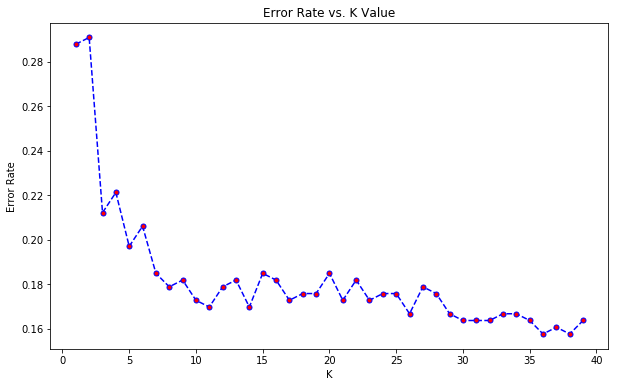

In [25]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

## Retrain with new K Value

**Retrain your model with the best K value (up to you to decide what you want) and re-do the classification report and the confusion matrix.**

In [ ]:
best_model = KNeighborsClassifier(n_neighbors=36)
best_model.fit(X_train, y_train)
predict = best_model.predict(X_test)

print(confusion_matrix(y_test,predict))
print("\n")
print(classification_report(y_test, predict))

WITH K=30


[[127  25]
 [ 23 125]]


             precision    recall  f1-score   support

          0       0.85      0.84      0.84       152
          1       0.83      0.84      0.84       148

avg / total       0.84      0.84      0.84       300



# Great Job!